<a href="https://colab.research.google.com/github/Diamantinomc/python-scripts/blob/master/clase4_actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Machine Learning
Bootcamp: Introducción a DS  
Dataset: Wholesale customers  
Fuente: UCI Machine Learning  

Adán Marchena

## Importar librerías

In [2]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # Para reducir dimensionalidad
from sklearn.metrics import silhouette_score  # Evaluar calidad de clusters
import kagglehub

# Configuración visualizaciones
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Importar dataset Wholesale Customers desde UCI MAchine Learning Repository

In [3]:
# Download latest version
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

## Análisis exploratorio (EDA)

### Primeras visualizaciones

In [4]:
# Tipos de datos
df.dtypes


,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [5]:
# Nombre de columnas
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
# Primeras 10 filas del dataset
df.head(10)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [7]:
# Últimas 10 filas del dataset
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [8]:
# Estadística básica
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Detección y manejo de nulos

In [9]:
# Datos nulos
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [10]:
# Suma de nulos
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


**NOTA**: Me percaté en este punto que el dataset no tenía datos nulos y quise cambiarlo para mostrar el manejo de dichos datos, pero por tiempo no alcancé.  
Aunque cabe decir que entiendo el proceso en caso de que estos datos existan:  
**fuerza bruta:** borrar todas las filas que contengan algún dato nulo  
Efectos: puede disminuir demasiado la cantidad de datos. No es muy recomendable.  
**Imputación de datos:**  
- Igualar datos nulos a 0: es una opción, pero entorpecería la estadística.
- Igualar a los datos más cercanos: se puede tomar el dato de la fila superior o inferior e igualar dicho dato.
- Rellenar con el promedio: se promedia el total de datos y se rellenan todos los nulos de la columna con este promedio.  
  
Estos procesos se utilizan generalmente en datos numéricos.  

### Distribución de variables

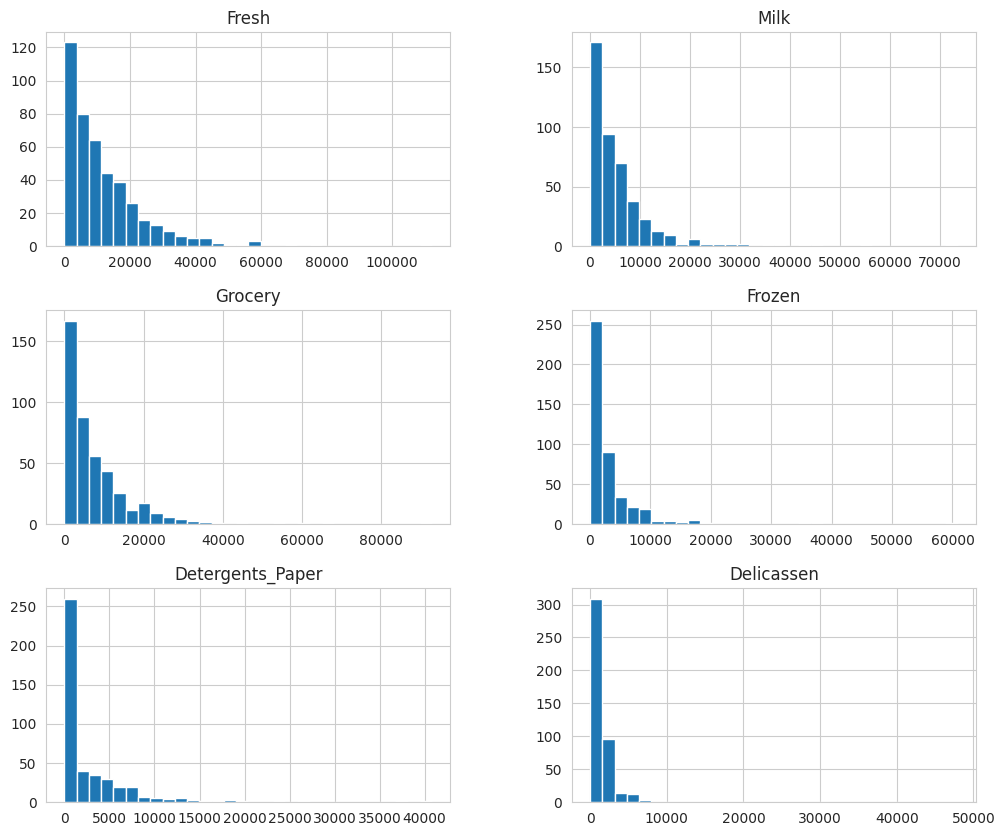

In [11]:
# Histogramas
df.drop(["Channel", "Region"], axis=1).hist(bins=30, figsize=(12, 10))
plt.show()

**Observaciones**
1. Distribución de los datos:

La mayoría de las variables presentan una distribución asimétrica positiva, con una concentración de clientes en rangos de gasto bajos o moderados y unos pocos clientes con gastos excepcionalmente altos (cola derecha).

Por ejemplo, en el histograma de Fresh, la mayoría de los clientes gastan menos de 30,000 unidades monetarias, mientras que unos pocos superan los 80,000.

2. Presencia de outliers:

Los valores extremos (outliers) son frecuentes, especialmente en variables como Fresh y Grocery. Estos outliers pueden distorsionar el algoritmo K-Means, ya que este es sensible a la escala y la dispersión de los datos.

3. Necesidad de preprocesamiento:

La asimetría y los outliers justifican el uso de técnicas como la normalización (StandardScaler) o la transformación logarítmica para escalar los datos y mejorar el rendimiento del clustering.

Sin este paso, variables con escalas mayores (como Fresh) dominarían el cálculo de distancias en K-Means, generando clusters sesgados.

4. Implicaciones para el clustering:

Los histogramas confirman que los clientes tienen patrones de compra heterogéneos, lo que permite agruparlos en segmentos claros (ej: pequeños minoristas vs. grandes restaurantes).

La distribución desigual también sugiere que algunos clusters pueden ser más pequeños pero con comportamientos muy específicos (como clientes con gastos altos en productos frescos).

### Correlaciones

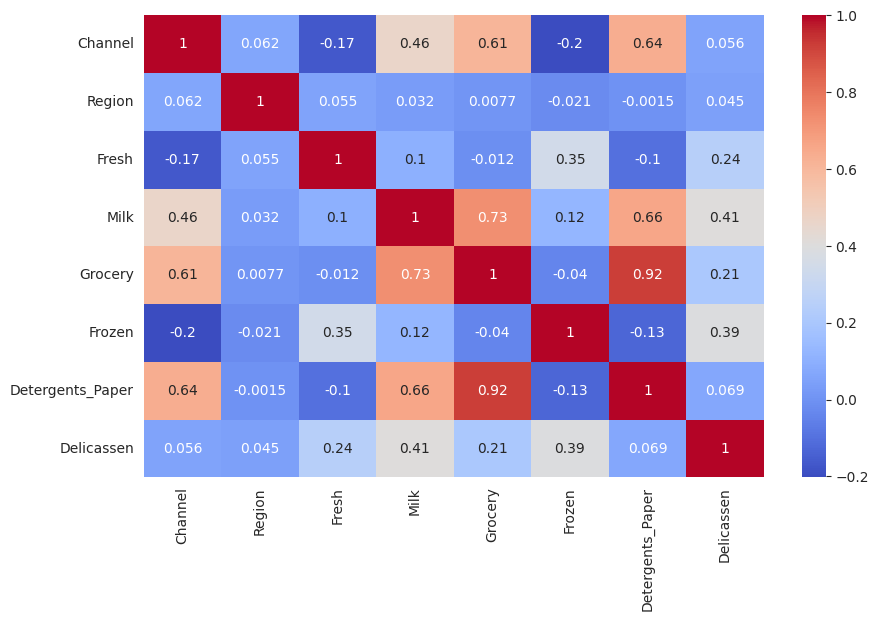

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

**Hallazgos**
1. Correlaciones fuertes positivas:

Grocery y Detergents_Paper (0.92): Los clientes que compran muchos abarrotes también suelen comprar productos de limpieza.

Milk y Grocery (0.73): Común en tiendas minoristas que venden ambos tipos de productos.

2. Correlaciones débiles:

Fresh y Frozen (0.34): La compra de productos frescos no está fuertemente ligada a los congelados.

3. Delicassen con otras variables (valores cercanos a 0): Comportamiento independiente.

4. Ausencia de correlaciones negativas fuertes:

No hay relaciones inversas significativas en este dataset.

## Procesamiento


### Eliminar variables categóricas (opcional)
Para clustering con K-Means, es mejor usar solo variables numéricas:

In [13]:
X = df.drop(["Channel", "Region"], axis=1)

### Normalización
K-Means es sensible a la escala de los datos. Usamos StandardScaler:

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Tratamiento de outliers (opcional)
Se puede usar el método del IQR para filtrar outliers extremos:

In [15]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_filtered = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

## Determinar número óptimo de clusters

### Método del codo
Interpretación: Elige el K donde la curva forma un "codo" (ej: K=3 o K=5).

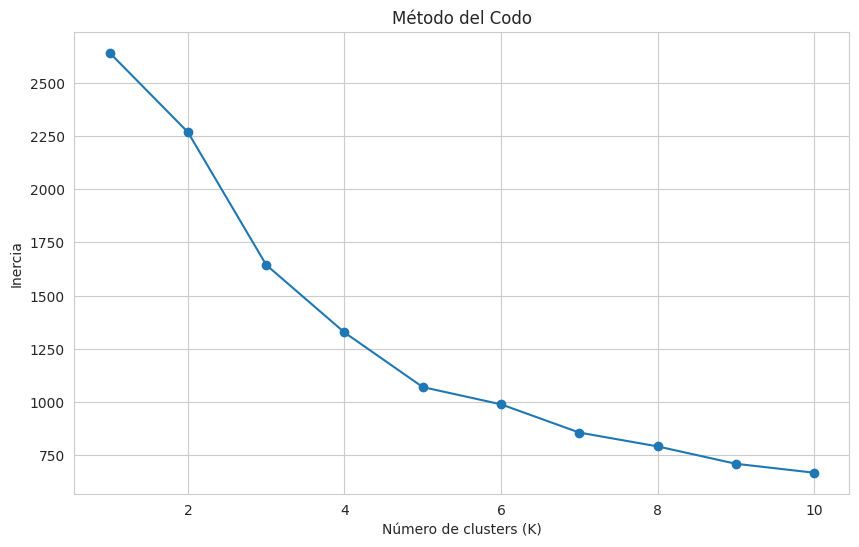

In [16]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.show()

### Método Silhouette
Interpretación: Elige el K con el puntaje más alto.

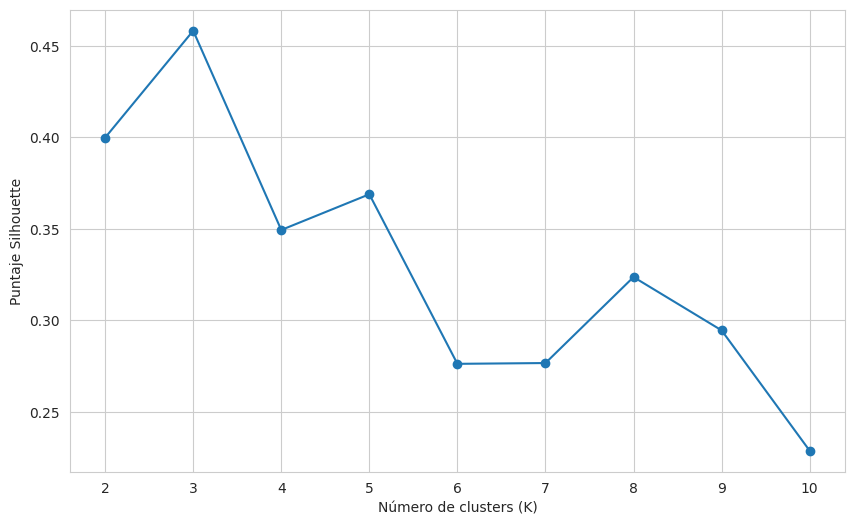

In [17]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Puntaje Silhouette")
plt.show()

## Aplicar K-means

In [18]:
k = 5  # Ejemplo basado en el método del codo
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir clusters al DataFrame original
df["Cluster"] = clusters

## Visualización de clusters

### PCA para reducir a 2D

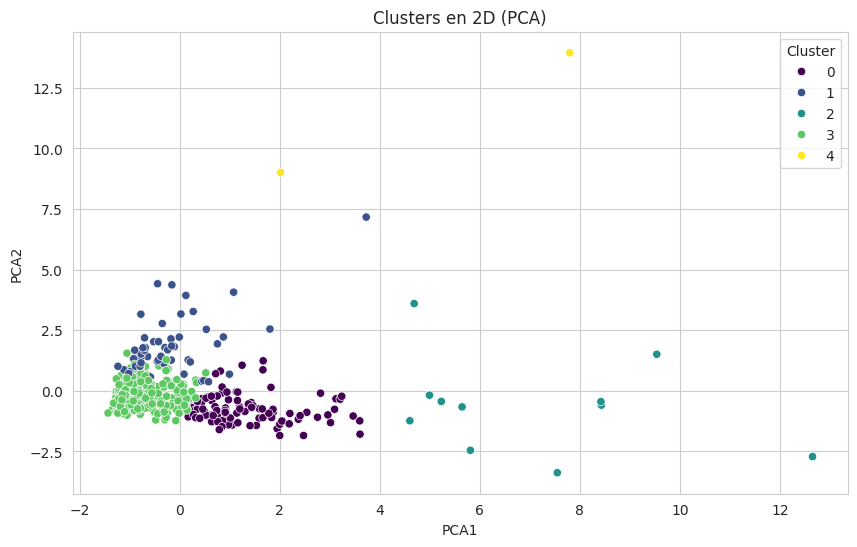

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.title("Clusters en 2D (PCA)")
plt.show()

### Boxplot por cluster

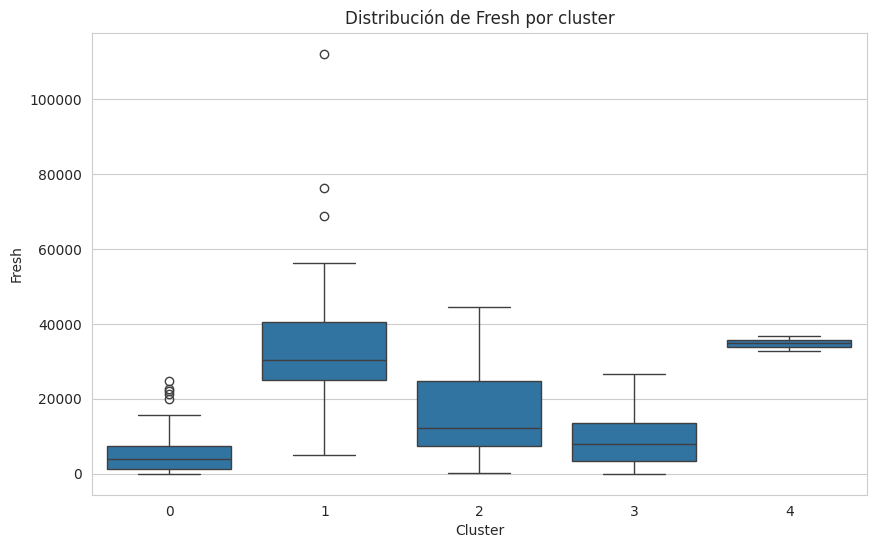

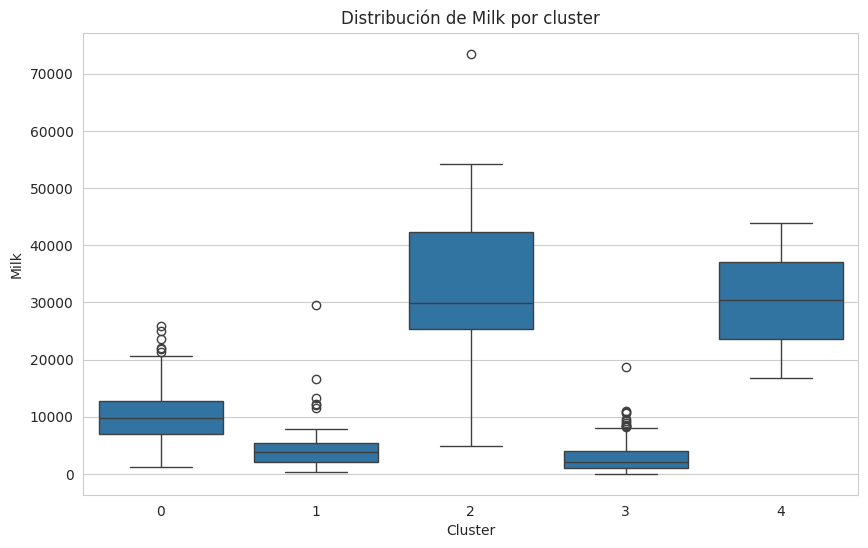

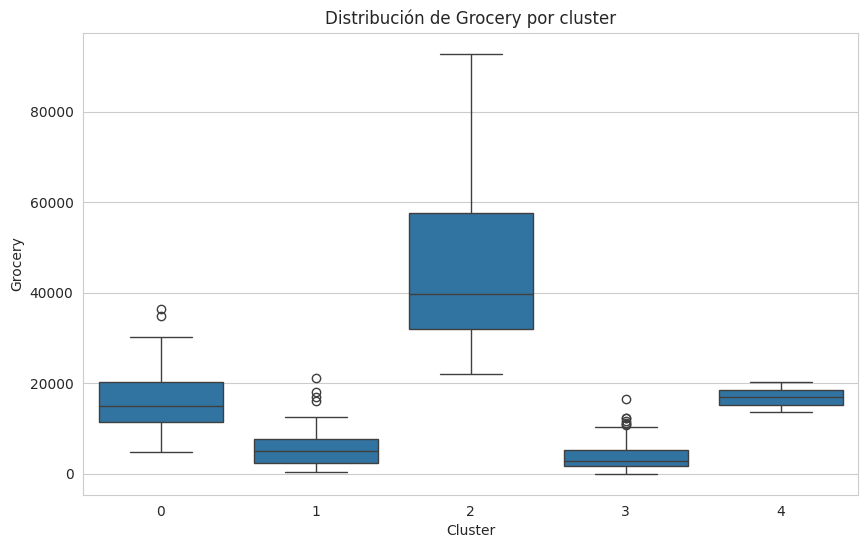

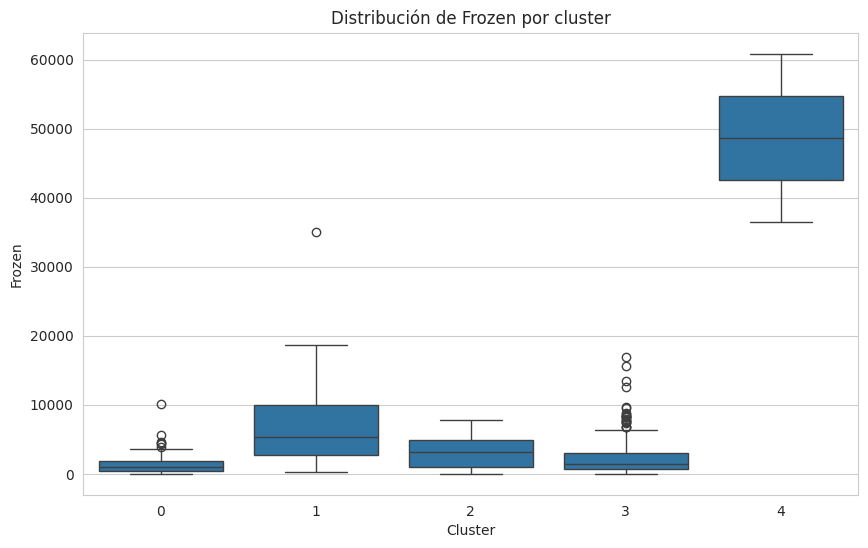

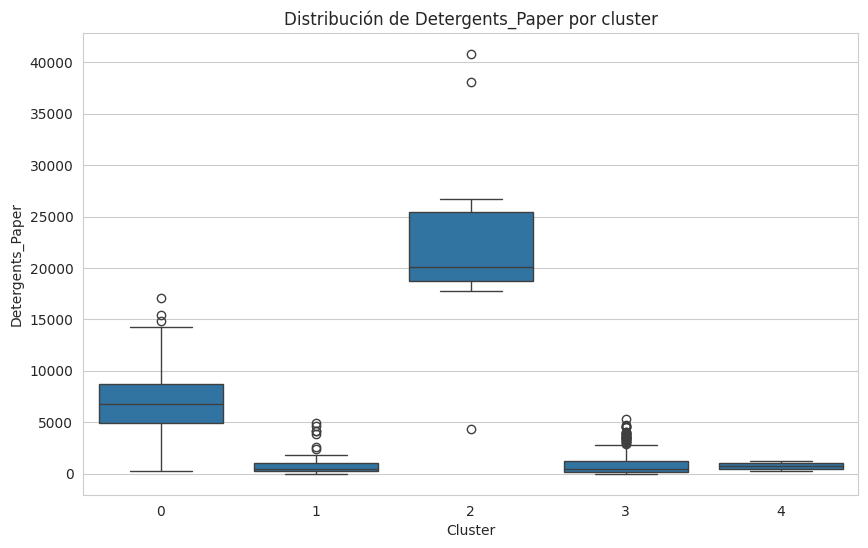

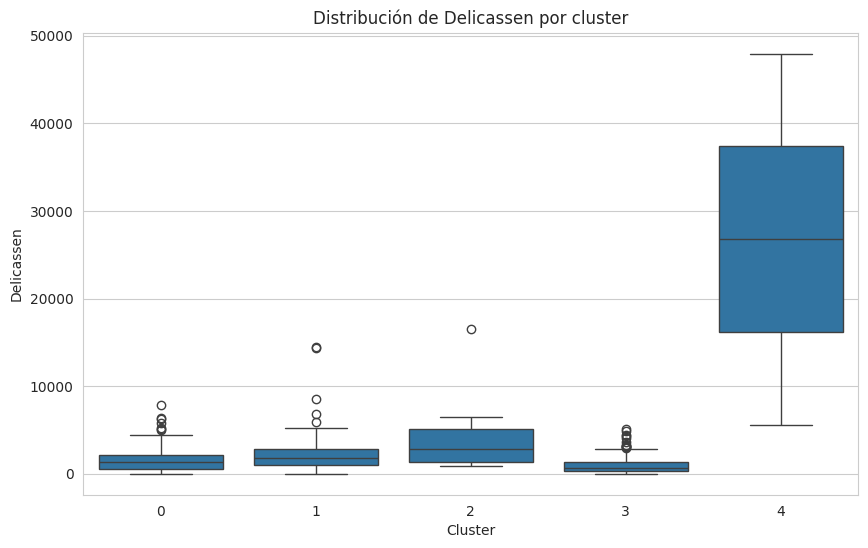

In [21]:
for column in X.columns:
    sns.boxplot(data=df, x="Cluster", y=column)
    plt.title(f"Distribución de {column} por cluster")
    plt.show()

## Interpretación de clusters

Analiza las medianas de cada producto por cluster:

In [24]:
cluster_means = df.groupby("Cluster").median().drop(["Channel", "Region", "PCA1", "PCA2"], axis=1)
print(cluster_means)

           Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicassen
Cluster                                                                  
0         3913.0   9721.0  14870.5    946.0            6756.5      1333.0
1        30379.0   3836.0   4955.0   5373.0             500.0      1824.0
2        12119.0  29892.0  39694.0   3232.0           20070.0      2870.0
3         8065.0   2157.0   2859.0   1470.0             422.0       708.0
4        34782.0  30367.0  16898.0  48701.5             755.5     26776.0


### Conclusión de boxplots
Los boxplots por cluster confirmaron que:

Los grupos son interpretables y alineados con segmentos reales (restaurantes, minoristas, etc.).

Existen oportunidades de negocio basadas en las diferencias de gasto.

Algunas variables aportan más discriminación que otras (ej: Grocery vs. Delicassen).

Recomendación: Usar estos insights para diseñar campañas de marketing dirigidas o ajustar el modelo incluyendo solo las variables más relevantes.

## Conclusión final
En este ejercicio se aplicó el algoritmo de K-Means sobre el dataset Wholesale Customers con el objetivo de encontrar grupos o segmentos de clientes según sus patrones de compra. Se realizó un preprocesamiento de los datos, incluyendo escalamiento y eliminación de valores atípicos, y posteriormente se aplicó una reducción de dimensionalidad mediante PCA para facilitar la visualización.

Tras analizar la gráfica del método del codo, se determinó un valor adecuado de k para el número de clusters. Los resultados muestran que es posible identificar distintos grupos de clientes con características similares, lo que podría ser útil para estrategias de marketing, ventas personalizadas o análisis de comportamiento.

Este trabajo representa un primer acercamiento al análisis no supervisado y al uso de técnicas como el clustering. En el futuro, se podría profundizar usando otras métricas de evaluación, probar diferentes algoritmos de clustering y explorar cómo estos grupos se relacionan con variables externas si estuvieran disponibles.